# SUPERVISED LEARNING - BUILDING YOUR FIRST CLASSIFICATION AND REGRESSION MODELS


### What is supervised learning?
Given a set of data with target column included, we want to train a model that can learn to map the input features (also known as the independent variables) to the target.


### Machine Learning Models

We are going to focus on 2 types of ML models in this session. Both of them are supervised in nature (labels are known and are to be predicted).
  

**Classification**
A classification model predicts discrete values. For example, classification models make predictions that answer questions like the following:

- Is a given email message spam or not spam?

- Is this an image of a dog, a cat, or a hamster?

  
**Regression**
A regression model predicts continuous values. For example, regression models make predictions that answer questions like the following:

- What is the value of a house in California?

- What is the probability that a user will click on this ad?
  


### Classification Model walkthrough

# **Load datasets into pandas dataframe**

In [1]:
import pandas as pd
import numpy as np

# import iris data using pandas
iris = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/iris.csv')

In [2]:
print(iris.shape)
iris.head(5)

(150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Data Types and Missing Values**

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# check null value counts in iris data
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

**Descriptive Statistics**

In [5]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [7]:
iris.groupby('variety').mean()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


# Split the Data into Train and Test

In Machine Learning problems, we always need to split the dataset into train and test sets in order to estimate the performance of the machine learning algorithm.  


1. Train set — a subset to train a model (80%)
2. Test set— a subset to test the trained model (20%)

Your model is trained on 80% of the data and this model is experimented with the 20% data to generate metrics on the model performance.

Let us split our datasets into train and test accordingly

In [8]:
from sklearn import model_selection

# Split data into train and test
iris_train,iris_test = model_selection.train_test_split(iris,test_size=0.2)
print("Shape of the original iris data: ", iris.shape)
print("Shape of the iris train data = ", iris_train.shape)
print("Shape of the iris test data = ", iris_test.shape)

#Resetting index for prediction time
iris_train = iris_train.reset_index(drop=True)
iris_test = iris_test.reset_index(drop=True)

Shape of the original iris data:  (150, 5)
Shape of the iris train data =  (120, 5)
Shape of the iris test data =  (30, 5)


In real life data science problems, often the data consist of a large number of attributes or features. This means selecting the most relevant features as the input to machine learning model is absolutely vital. 


**Curse of Dimensionality**


The curse of dimensionality refers to various phenomena that arise when analyzing and organizing data in high-dimensional spaces (often with hundreds or thousands of dimensions) that do not occur in low-dimensional settings such as the three-dimensional physical space of everyday experience. 

As the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This sparsity is problematic for any method that requires statistical significance.

Therefore it is essential to quality control the data that is being fed to the model.

Reference - https://en.wikipedia.org/wiki/Curse_of_dimensionality

**Feature Selection Methods:**
1. Correlation coefficient
2. Variance threshold
3. Recursive Feature Elimination
4. LASSO regularization
4. Random Forest Importance


Reference - https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

#### Variance Threshold - Remove Low Var Features

Variance threshold method removes features whose variance below a pre-defined cutoff value. It is based on the notion that features that do not vary much within themselves have low predictive power. The main weakness of variance threshold is that it does not consider the relationship of input features with the output feature.

It should be noted that, before performing variance thresholding, all features should be standardized so they will have the same scale.

Scikit-learn provides VarianceThreshold function to perform variance threshold method.

Variance Threshold Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [9]:
iris_features = iris.drop('variety', axis=1)

In [10]:
iris_features.shape

(150, 4)

In [11]:
from sklearn.feature_selection import VarianceThreshold

iris_var = VarianceThreshold()

# Perform variance thresholding
iris_var.fit_transform(iris_features)

# Print the name and variance of each feature
for feature in zip(iris_features.columns, iris_var.variances_):
    print(feature)

('sepal.length', 0.6811222222222223)
('sepal.width', 0.1887128888888889)
('petal.length', 3.0955026666666665)
('petal.width', 0.5771328888888888)


Visualize using bar chart

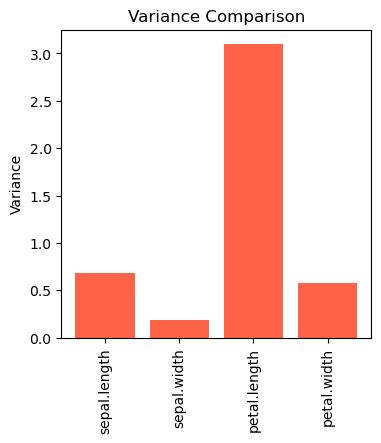

In [12]:
# Create a bar chart for visualizing the variances
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,4))
plt.bar(x=iris_features.columns, height=iris_var.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

By default, VarianceThreshold removes only zero-variance features. Zero-variance feature means that the feature has the same value in all instances. Suppose we want to eliminate features that have variance score below 0.2, we can specify threshold parameter.

In [13]:
# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold(threshold=0.2)

# Transform the dataset according to variance thresholding
iris_features_new = selector.fit_transform(iris_features)

# Print the results
print('Number of features before variance thresholding: {}'.format(iris_features.shape[1]))
print('Number of features after variance thresholding: {}'.format(iris_features_new.shape[1]))

Number of features before variance thresholding: 4
Number of features after variance thresholding: 3


#### Split data into features and label

For machine learning problems, you need to split your data into features and labels.


1.   Features - Input X to the model
2.   Label - Expected output Y

Therefore, we will further split these train and test datasets by columns, so that for every dataset we have **features** and **labels** to denote if they are the input columns or the predict to columns



In [14]:
#define input and predict to columns
iris_features = ['sepal.length', 'petal.length', 'petal.width']
iris_labels = ['variety']

print('IRIS DATASET')
print("Features - " + str(iris_features))
print("Labels - " + str(iris_labels))

iris_train_features = iris_train[iris_features]
iris_train_label = iris_train[iris_labels]
print('✔ Train data split into features and labels')

iris_test_features = iris_test[iris_features]
iris_test_label = iris_test[iris_labels]
print('✔ Test data split into features and labels')

IRIS DATASET
Features - ['sepal.length', 'petal.length', 'petal.width']
Labels - ['variety']
✔ Train data split into features and labels
✔ Test data split into features and labels


### Decision Trees
Decision Trees is used for solving supervised learning problems for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

The decision rules are generally in form of if-then-else statements. The deeper the tree, the more complex the rules and fitter the model.

**Terminology**

Root Node: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.

Splitting: It is a process of dividing a node into two or more sub-nodes.

Decision Node: When a sub-node splits into further sub-nodes, then it is called the decision node.
Leaf/Terminal Node: Nodes do not split is called Leaf or Terminal node.

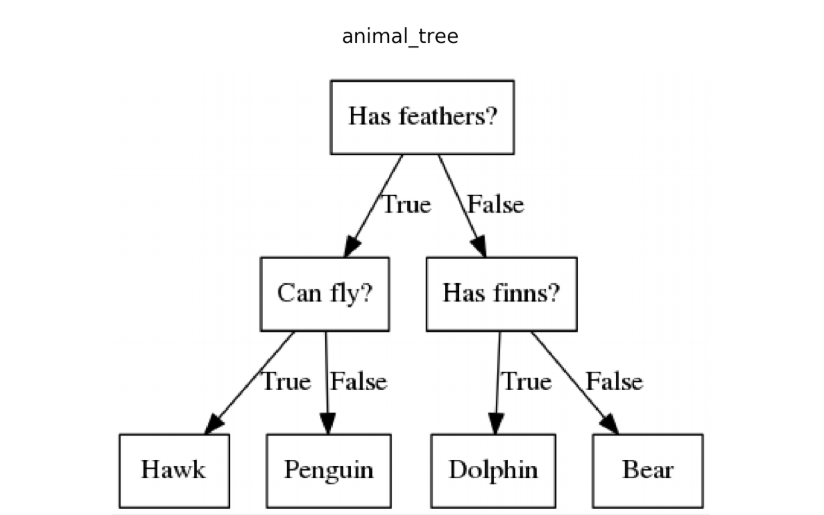


Documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [15]:
from sklearn.tree import DecisionTreeClassifier

# create the model object
dt = DecisionTreeClassifier(max_depth=3) # max-depth controls the maximum depth of the tree

# fit the model on train data
dt.fit(iris_train_features, iris_train_label)

DecisionTreeClassifier(max_depth=3)

In [16]:
#Predictions on the Test data
predictions_dt = dt.predict(iris_test_features)

#Putting the above predictions and probabilities together to create a readable df
iris_pred_label = pd.DataFrame(predictions_dt.reshape(len(predictions_dt),1))
iris_pred_label.rename(columns={0:'dt_prediction'}, inplace=True)
iris_pred_label.head(5)

,dt_prediction
0,Versicolor
1,Versicolor
2,Virginica
3,Setosa
4,Setosa


In [17]:
#Concat the predictions of linear regression to the test dataset
iris_test_pred = pd.concat([iris_test_label, iris_pred_label], axis=1)
iris_test_pred.head()

,variety,dt_prediction
0,Versicolor,Versicolor
1,Virginica,Versicolor
2,Virginica,Virginica
3,Setosa,Setosa
4,Setosa,Setosa


# Model Evaluation

In [18]:
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(iris_test_label, iris_pred_label)*100.0, "%")

accuracy is 96.66666666666667 %


Confusion Matrix: A table used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [19]:
# Creates a confusion matrix
import sklearn.metrics as metrics
import seaborn as sns
cm = metrics.confusion_matrix(iris_test_label, iris_pred_label) 

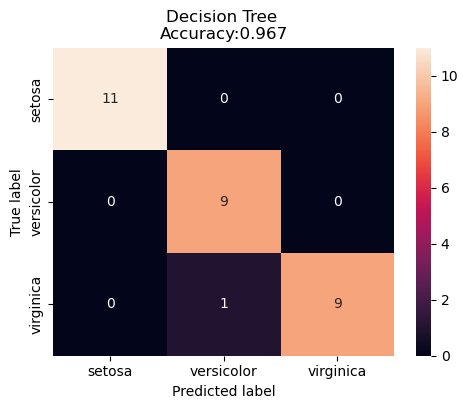

In [20]:
 # Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(iris_test_label, iris_pred_label)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

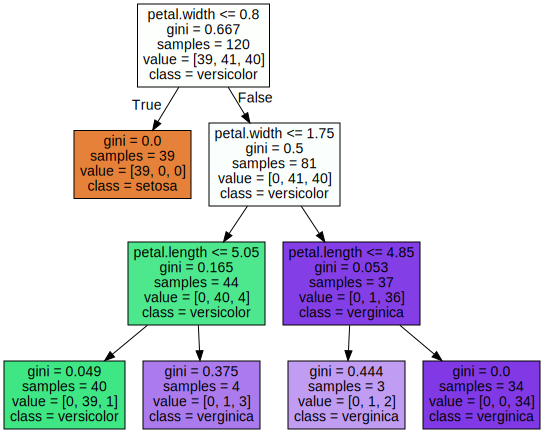

In [21]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=iris_features,  
                                class_names=['setosa', 'versicolor', 'verginica'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Understanding the roc and auc curves

click here: https://towardsdatascience.com/understanding-the-roc-and-auc-curves-a05b68550b69